# Predicting Customer Churn Rate
#### By Aparna Shasty

## Overview
This is a mini project to demonstrate the following skills:
+ Recognizing the business problem, collecting data
+ Exploratory Data Analysis (EDA) and Visualizations
+ Running Hypothesis Tests
+ Training and Testing Machine Learning models
+ Evaluate Feature Importance
+ Comparing ML Models/improving the performance
+ Drawing inferences
+ Data Storytelling
### Business Problem
A telecom company wants to retain its customer as much as possible. It is much more expensive to attract new customer than retaining old customer. At the same time, spending on retaining customer who has no intention to leave is a waste money. Therefore it is important to identify the customer who has high probability of leaving in the absence of any initiative to retain. An analysis of past records of the customers can give great insights on who might leave and who may not. The telecom company already has this data available and data scientist need not collect the data in this case.
### Step by Step approach to Predicting Customer Churn Rate
#### Data Wrangling

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [100]:
ch = pd.read_csv('https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv')
ch.info()
ch_orig = ch.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

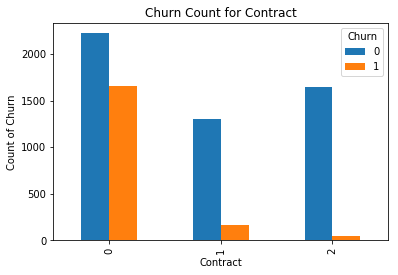

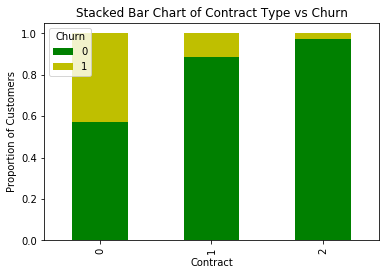

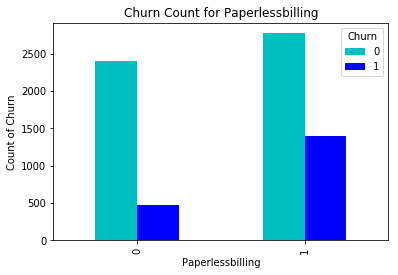

In [179]:
_ = pd.crosstab(ch.Contract,ch.Churn).plot.bar()
_ = plt.title('Churn Count for Contract')
_ = plt.xlabel('Contract')
_ = plt.ylabel('Count of Churn')
# The above plot as stacked bar for learning purposes
table=pd.crosstab(ch.Contract, ch.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color='gy')
_ = plt.title('Stacked Bar Chart of Contract Type vs Churn')
_ = plt.xlabel('Contract')
_ = plt.ylabel('Proportion of Customers')
# Paperless billing
_ = pd.crosstab(ch.PaperlessBilling,ch.Churn).plot.bar(color='cb')
_ = plt.title('Churn Count for Paperlessbilling')
_ = plt.xlabel('Paperlessbilling')
_ = plt.ylabel('Count of Churn')

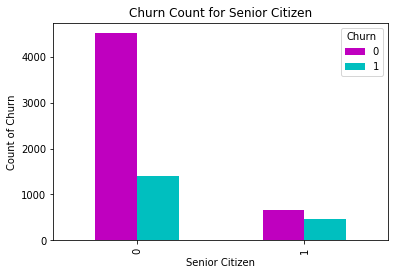

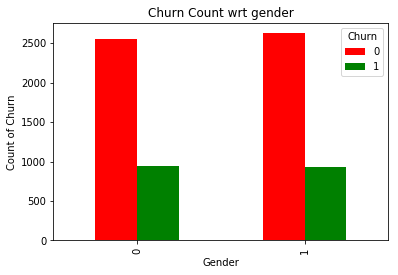

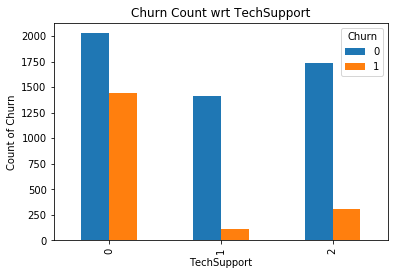

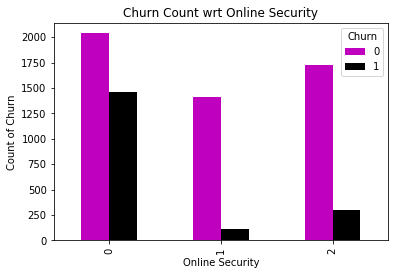

In [181]:
_ = pd.crosstab(ch.SeniorCitizen,ch.Churn).plot.bar(color='mc')
_ = plt.title('Churn Count for Senior Citizen')
_ = plt.xlabel('Senior Citizen')
_ = plt.ylabel('Count of Churn')
_ = plt.figure()
_ = pd.crosstab(ch.gender,ch.Churn).plot.bar(color='rg')
_ = plt.title('Churn Count wrt gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Count of Churn')
_ = plt.figure()
_ = pd.crosstab(ch.TechSupport,ch.Churn).plot.bar()
_ = plt.title('Churn Count wrt TechSupport')
_ = plt.xlabel('TechSupport')
_ = plt.ylabel('Count of Churn')
_ = plt.figure()
_ = pd.crosstab(ch.OnlineSecurity,ch.Churn).plot.bar(color='mk')
_ = plt.title('Churn Count wrt Online Security')
_ = plt.xlabel('Online Security')
_ = plt.ylabel('Count of Churn')

**Remark**: We see that heights of all bars except in gender bar chart are varying by great extent.

In [182]:
ch1 = ch[['SeniorCitizen','tenure','MonthlyCharges']]
ch2 = ch.drop(['SeniorCitizen','tenure','MonthlyCharges'],axis=1)
ch3 = ch2.apply(lambda x: x.astype('category'))
ch  = ch3.apply(lambda x: x.cat.codes)
ch[['SeniorCitizen','tenure','MonthlyCharges']] = ch1
print("Mean Churn Rate for various contract types",ch.groupby('Contract')['Churn'].mean())
print("Mean Churn Rate for Gender:",ch.groupby('gender')['Churn'].mean())
print("Mean Churn Rate for TechSupport:",ch.groupby('TechSupport')['Churn'].mean())
print("Mean Churn Rate for Senior Citizen:",ch.groupby('SeniorCitizen')['Churn'].mean())
print("Mean Churn Rate for Online Security:",ch.groupby('OnlineSecurity')['Churn'].mean())

Mean Churn Rate for various contract types Contract
0    0.427097
1    0.112695
2    0.028319
Name: Churn, dtype: float64
Mean Churn Rate Vs Gender: gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64
Mean Churn Rate Vs TechSupport: TechSupport
0    0.416355
1    0.074050
2    0.151663
Name: Churn, dtype: float64
Mean Churn Rate Vs Senior Citizen: SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64
Mean Churn Rate Vs Online Security: OnlineSecurity
0    0.417667
1    0.074050
2    0.146112
Name: Churn, dtype: float64


**Remark:** Except gender, other groups have variable mean churn rates. These will be very helpful in modeling.

In [111]:
ch.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,...,0.985376,0.992475,0.690473,0.592219,1.574329,3257.794122,0.265370,0.162147,32.371149,64.761692
std,2033.283305,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,...,0.885002,0.885091,0.833755,0.491457,1.068104,1888.693496,0.441561,0.368612,24.559481,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,1760.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1609.000000,0.000000,0.000000,9.000000,35.500000
50%,3521.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,3249.000000,0.000000,0.000000,29.000000,70.350000
75%,5281.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,4901.500000,1.000000,0.000000,55.000000,89.850000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,6530.000000,1.000000,1.000000,72.000000,118.750000


The above info indicates that data is clean, all cells in dataframe are filled. We might need to check for how many unique entries some of them have. We could examine some of them by plotting histogram.

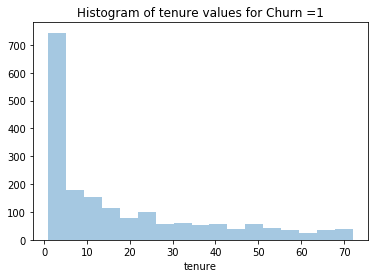

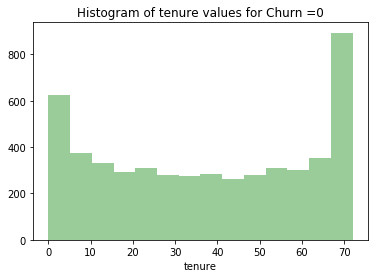

In [23]:
sns.distplot(ch.loc[ch.Churn==1,'tenure'],hist=True,kde=False)
_ = plt.title('Histogram of tenure values for Churn =1')
_ = plt.figure()
sns.distplot(ch.loc[ch.Churn==0,'tenure'],hist=True,color='g',kde=False)
_ = plt.title('Histogram of tenure values for Churn =0')

**Remark:** There is a clear distinction in the shape of the two hostograms above. 
+ Customers who cut the contract (churn = 1) are highly concentrated towards lesser tenure (<= 4 years). The number of customers in each higher bin progressively reduces.That is exactly why this is Churn =1 group!
+ The second plot is rather interesting. 
+ The first peak in the second plot tells that there are many more new customers than those in each of the other bins except the last one.
+ Second bin to third bin, there is huge reduction, as some have Churned.
+ Customers who have crossed 20 years are likely to remain loyal and hence the counts are almost same until bin centered 60.
+ The last peak is a fact about the current dataset. It seems like there are many old customers (> 850) who have stayed with the connection for more than 60 years. Does this mean that 60 years ago, customer churn started and there was a sudden drop from which the company is trying to recover?

Mean Tenure of Two groups
 Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


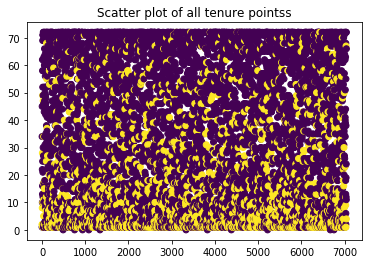

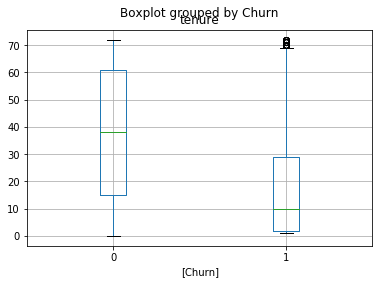

In [69]:
_ = plt.scatter(range(ch.tenure.count()),ch.tenure,c= ch.Churn )
_ = plt.title('Scatter plot of all tenure pointss')
print("Mean Tenure of Two groups\n",ch.groupby('Churn').tenure.mean())
_ = plt.figure()
_ = ch[['Churn','tenure']].boxplot(by='Churn')

The scatter plot of tenure for Churn = 0  and churn = 1 (purple) indicates that they are moderately separable with respect to tenure.
The huge difference in the mean tenure also makes us suspect that there is a clear separability. Boxplot gives even a clearer visibility on the difference.
We could run a 2 sample hypothesis test to verify this.

H0: mu1 = mu0

HA: mu1 != mu0

alpha = 0.01

In [85]:
sigma12 = np.sqrt((ch[ch.Churn==1].tenure.std()/ch[ch.Churn==1].tenure.count()) + (ch[ch.Churn==0].tenure.std()/ch[ch.Churn==0].tenure.count()))
zsc12 = abs(ch[ch.Churn==1].tenure.mean() - ch[ch.Churn==0].tenure.mean())/sigma12
print("Zscore for the two sample test = ",zsc12)

Zscore for the two sample test =  159.371965769


The high Z score indicates that that p-value is negligibly small (almost 0), hence H0 is rejected in favor of HA

Mean Total Charge paid by Two groups
 Churn
0    3241.35949
1    3303.29053
Name: TotalCharges, dtype: float64


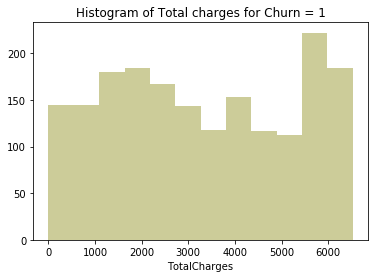

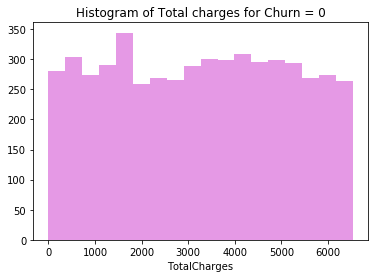

In [60]:
_ = sns.distplot(ch.loc[ch.Churn==1,'TotalCharges'],hist=True,kde=False,color='olive')
_ = plt.title('Histogram of Total charges for Churn = 1')
_ = plt.figure()
_ = sns.distplot(ch.loc[ch.Churn==0,'TotalCharges'],hist=True,kde=False,color='m')
_ = plt.title('Histogram of Total charges for Churn = 0')
print("Mean Total Charge paid by Two groups\n",ch.groupby('Churn').TotalCharges.mean())

There is not much difference in mean total charges. In the churn category, there are more people paying more than 5500 bucks than in other categories.

Mean Monthly Charge paid by Two groups
 Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


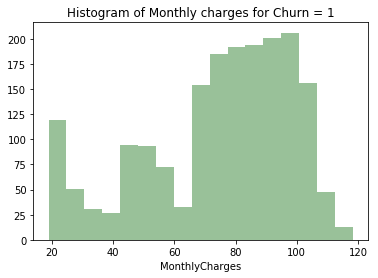

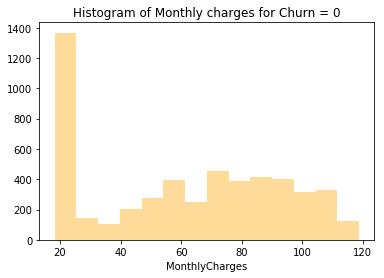

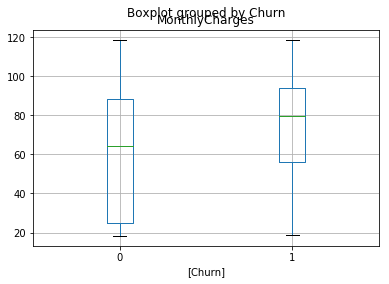

In [70]:
_ = sns.distplot(ch.loc[ch.Churn==1,'MonthlyCharges'],hist=True,kde=False,color='darkgreen')
_ = plt.title('Histogram of Monthly charges for Churn = 1')
_ = plt.figure()
_ = sns.distplot(ch.loc[ch.Churn==0,'MonthlyCharges'],hist=True,kde=False,color='orange')
_ = plt.title('Histogram of Monthly charges for Churn = 0')
print("Mean Monthly Charge paid by Two groups\n",ch.groupby('Churn').MonthlyCharges.mean())
_ = ch[['Churn','MonthlyCharges']].boxplot(by='Churn')

**Remarks:** Clearly there is a significant number of customers in the Churn group whose monthly charges are towards higher end(70 to 120). On the other hand, the non churn group has close to 1400 customers in bin value 20. The box plot gives a better clue on the spread. We can run a two sample hypothesis test to understand this better.

In [86]:
sigma12 = np.sqrt((ch[ch.Churn==1].MonthlyCharges.std()/ch[ch.Churn==1].MonthlyCharges.count()) + (ch[ch.Churn==0].MonthlyCharges.std()/ch[ch.Churn==0].MonthlyCharges.count()))
zsc12 = abs(ch[ch.Churn==1].MonthlyCharges.mean() - ch[ch.Churn==0].MonthlyCharges.mean())/sigma12
print("Zscore for the two sample test for monthly charges= ",zsc12)

Zscore for the two sample test for monthly charges=  95.0741047908


The high Z score indicates good separation between the two groups.

In [160]:
y = ch.Churn
X = ch.drop(['customerID','Churn','PhoneService'],axis=1,inplace=False) # Dropping Phone service because it is subset of multiple lines

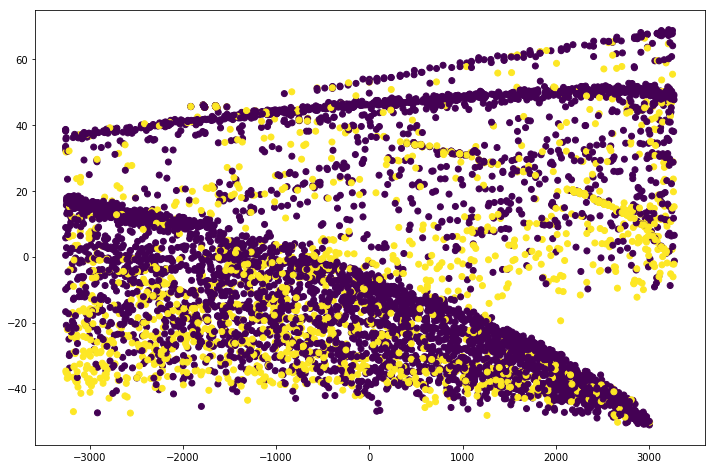

In [116]:
from sklearn.decomposition import PCA
pca = PCA()
plt.figure(figsize=(12,8))
xx = pca.fit_transform(X)
xs = xx[:,0]
ys = xx[:,1]
plt.scatter(xs,ys,c=y)

In [118]:
# Creating Dummies to suit logistic regression.
# First find which variable has more than 2 categories
X.nunique()

gender                 2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
SeniorCitizen          2
tenure                73
MonthlyCharges      1585
dtype: int64

In [161]:
cat_vars=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(ch[var], prefix=var)
    X1=X.join(cat_list)
    X=X1
X.drop(cat_vars,axis=1,inplace=True)
X.drop(['MultipleLines_2','InternetService_2','OnlineSecurity_2','OnlineBackup_2','DeviceProtection_2',
       'TechSupport_2','StreamingTV_2','StreamingMovies_2','Contract_2','PaymentMethod_3'],axis=1,inplace=True)
X.columns

Index(['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'MultipleLines_0',
       'MultipleLines_1', 'InternetService_0', 'InternetService_1',
       'OnlineSecurity_0', 'OnlineSecurity_1', 'OnlineBackup_0',
       'OnlineBackup_1', 'DeviceProtection_0', 'DeviceProtection_1',
       'TechSupport_0', 'TechSupport_1', 'StreamingTV_0', 'StreamingTV_1',
       'StreamingMovies_0', 'StreamingMovies_1', 'Contract_0', 'Contract_1',
       'PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2'],
      dtype='object')

In [132]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [183]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
Xtrain, Xt, ytrain,yt = train_test_split(X_new,y,test_size=0.4,random_state=42,stratify=y)
Xdev, Xtest, ydev,ytest = train_test_split(Xt,yt,test_size=0.5,random_state=42,stratify=yt)

Confusion Matrix:
 [[917 110]
 [176 206]]
Report:
              precision    recall  f1-score   support

          0       0.84      0.89      0.87      1027
          1       0.65      0.54      0.59       382

avg / total       0.79      0.80      0.79      1409

Dev Set Accuracy 0.797019162527
Train set Accuracy 0.805443786982


Text(0.5,0,'False Positive Rate')

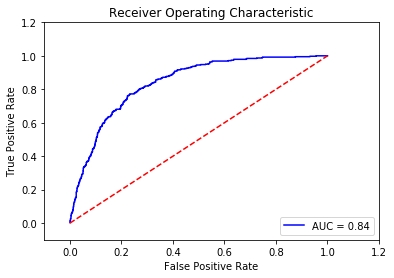

In [134]:
logreg = LogisticRegression()
logreg.fit(Xtrain,ytrain)
yp_dev = logreg.predict(Xdev)
print("Confusion Matrix:\n",confusion_matrix(ydev,yp_dev))
print("Report:\n",classification_report(ydev,yp_dev))
print("Dev Set Accuracy",accuracy_score(ydev,yp_dev))
print("Train set Accuracy",accuracy_score(ytrain,logreg.predict(Xtrain)))
yprob = logreg.predict_proba(Xdev)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, yprob[:,1],pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [149]:
# Trying Feature Selection
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 20)
rfe = rfe.fit(Xtrain, ytrain)
print(rfe.support_)
print(rfe.ranking_)
Xp = X.loc[:,X.columns[rfe.support_]]


[False False  True  True  True False  True  True  True False  True  True
  True  True False False False  True  True  True  True  True  True  True
  True  True False False  True]
[ 9 10  1  1  1  7  1  1  1  3  1  1  1  1  8  2  4  1  1  1  1  1  1  1  1
  1  6  5  1]


In [150]:
X_new = scaler.fit_transform(Xp)
Xtrain, Xt, ytrain,yt = train_test_split(X_new,y,test_size=0.4,random_state=42,stratify=y)
Xdev, Xtest, ydev,ytest = train_test_split(Xt,yt,test_size=0.5,random_state=42)

Confusion Matrix:
 [[917 110]
 [173 209]]
Report:
              precision    recall  f1-score   support

          0       0.84      0.89      0.87      1027
          1       0.66      0.55      0.60       382

avg / total       0.79      0.80      0.79      1409

Dev Set Accuracy 0.79914833215
Train set Accuracy 0.804970414201


Text(0.5,0,'False Positive Rate')

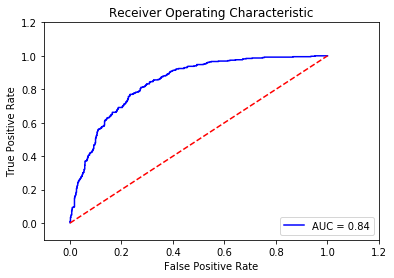

In [151]:
logreg = LogisticRegression()
logreg.fit(Xtrain,ytrain)
yp_dev = logreg.predict(Xdev)
print("Confusion Matrix:\n",confusion_matrix(ydev,yp_dev))
print("Report:\n",classification_report(ydev,yp_dev))
print("Dev Set Accuracy",accuracy_score(ydev,yp_dev))
print("Train set Accuracy",accuracy_score(ytrain,logreg.predict(Xtrain)))
yprob = logreg.predict_proba(Xdev)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, yprob[:,1],pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=21)
dec_tree.fit(Xtrain,ytrain)
print("Train accuracy",dec_tree.score(Xtrain,ytrain))
print("Test accuracy",dec_tree.score(Xtest,ytest))

Confusion Matrix:
 [[786 249]
 [ 83 291]]
Report:
              precision    recall  f1-score   support

          0       0.90      0.76      0.83      1035
          1       0.54      0.78      0.64       374

avg / total       0.81      0.76      0.78      1409

Dev Set Accuracy 0.764371894961
Train set Accuracy 0.891597633136


Text(0.5,0,'False Positive Rate')

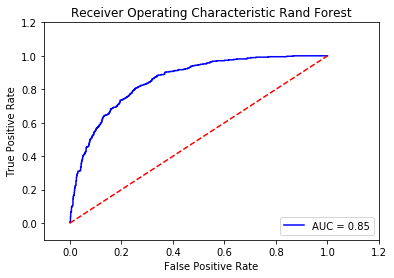

In [193]:
rand_forest = RandomForestClassifier(250,'entropy',13,min_samples_leaf=3)
rand_forest.fit(Xtrain,ytrain)
yp_dev = rand_forest.predict(Xdev)
yn = yprob[:,1] >= 0.3
print("Confusion Matrix:\n",confusion_matrix(ydev,yn))
print("Report:\n",classification_report(ydev,yn))
print("Dev Set Accuracy",accuracy_score(ydev,yn))
print("Train set Accuracy",accuracy_score(ytrain,rand_forest.predict(Xtrain)))
yprob = rand_forest.predict_proba(Xdev)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, yprob[:,1],pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Rand Forest')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [194]:
fi = rand_forest.feature_importances_ 
fi[np.argsort(fi)]
X.columns[np.argsort(fi)]

Index(['StreamingTV_1', 'DeviceProtection_1', 'StreamingMovies_1',
       'MultipleLines_1', 'OnlineSecurity_1', 'TechSupport_1',
       'OnlineBackup_1', 'PaymentMethod_1', 'PaymentMethod_0', 'SeniorCitizen',
       'StreamingTV_0', 'StreamingMovies_0', 'Dependents', 'InternetService_0',
       'Contract_1', 'DeviceProtection_0', 'Partner', 'MultipleLines_0',
       'PaperlessBilling', 'gender', 'OnlineBackup_0', 'PaymentMethod_2',
       'InternetService_1', 'TechSupport_0', 'OnlineSecurity_0', 'Contract_0',
       'TotalCharges', 'MonthlyCharges', 'tenure'],
      dtype='object')

In [ ]:
svc_model = SVC(C=0.1,random_state=21)
svc_model.fit(Xtrain,ytrain)
print("Train accuracy",svc_model.score(Xtrain,ytrain))
print("Test accuracy",svc_model.score(Xdev,ydev))
print(classification_report(ytest,svc_model.predict(Xdev)))
yprob = svc_model.decision_function(Xdev)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, yprob,pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Clustering the Churn population
+ Red: Charges below 60, and dense at less than 20 years, sparse at more than 25 years
+ Blue: Charges above 60, less than 25 years tenure
+ Green: Charges above 60 and more than 25 years tenure.

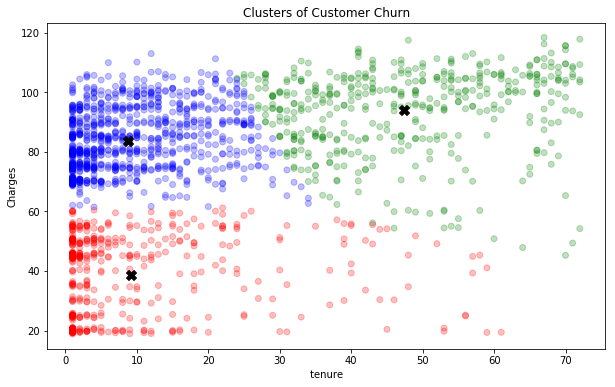

In [222]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Customer Churn
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(ch[ch.Churn==1][["tenure","MonthlyCharges"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="tenure",y="MonthlyCharges", data=ch[ch.Churn==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel(" tenure ")
plt.ylabel("Charges")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Customer Churn")
plt.show()


### Clustering the non-Churn population for studying the difference

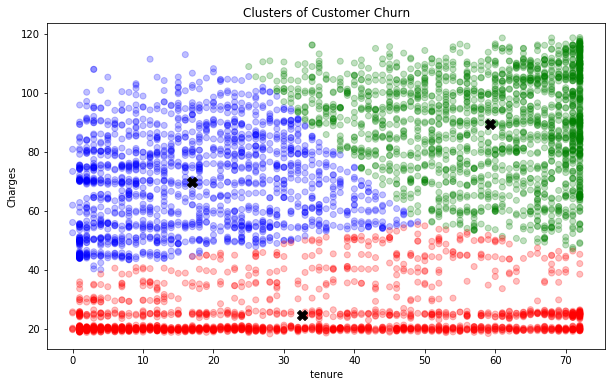

In [223]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Customer Churn
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(ch[ch.Churn==0][["tenure","MonthlyCharges"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="tenure",y="MonthlyCharges", data=ch[ch.Churn==0],
            alpha=0.25,color = kmeans_colors)
plt.xlabel(" tenure ")
plt.ylabel("Charges")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Customer Churn")
plt.show()


Reducing the charges is definitely a good incentive for customer retention.

([array([   6.,   38.,   61.,   68.,  103.,  121.,  138.,  166.,  241.,  467.]),
  array([ 467.,  241.,  166.,  138.,  121.,  103.,   68.,   61.,   38.,    6.])],
 array([  1.05263158e-04,   1.00084211e-01,   2.00063158e-01,
          3.00042105e-01,   4.00021053e-01,   5.00000000e-01,
          5.99978947e-01,   6.99957895e-01,   7.99936842e-01,
          8.99915789e-01,   9.99894737e-01]),
 <a list of 2 Lists of Patches objects>)

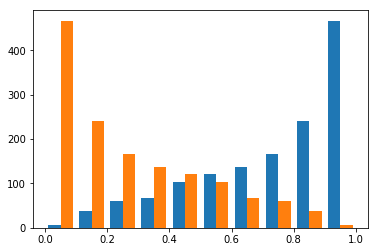

In [213]:
plt.hist(abs(yprob))

In [ ]:
print(confusion_matrix(ydev,svc_model.predict(Xdev)))
print(classification_report(ydev,svc_model.predict(Xdev)))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.3)
logreg.fit(Xtrain,ytrain)
print("Train accuracy",logreg.score(Xtrain,ytrain))
print("Test accuracy",logreg.score(Xdev,ydev))
coeff = logreg.coef_

In [ ]:
print(confusion_matrix(ydev,logreg.predict(Xdev)))
print(classification_report(ydev,logreg.predict(Xdev)))

In [ ]:
yprob = logreg.predict_proba(Xdev)

In [ ]:
ypre = yprob[:,1] > 0.3
print(classification_report(ydev,ypre))
mm = confusion_matrix(ydev,ypre)
print(mm)
print("Accuracy:",(mm[0,0]+mm[1,1])/(mm[0,0]+mm[0,1]+mm[1,0]+mm[1,1]))

In [ ]:
thresholds.shape

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, yprob[:,1],pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)

Remarks: We are interested in customers who have tendency to go away (i.e. label 1). We may not mind a few false alarms especially if the measures taken to retain them is relatively inexpensive compared to the loss due to missing the true alarms.
We want high recall on class 1. 

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
true_positive_rate[325:],thresholds[325:],false_positive_rate[325:]

Reference on how to plot AUC is [here](https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(Xtrain,ytrain)
y_pred = nb_model.predict(Xtest)
print("Train accuracy",nb_model.score(Xtrain,ytrain))
print("Test accuracy",nb_model.score(Xtest,ytest))

In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
XX = scaler.fit_transform(X)
pca = PCA()
XX1 = pca.fit_transform(XX)
plt.bar(range(pca.n_components_),pca.explained_variance_)

In [ ]:
XX = XX1[:,:]
Xtrain, Xtest, ytrain,ytest = train_test_split(XX,y,test_size=0.3,random_state=42)
rand_forest = RandomForestClassifier(n_estimators=14, random_state=21)
rand_forest.fit(Xtrain,ytrain)
print("Train accuracy",rand_forest.score(Xtrain,ytrain))
print("Test accuracy",rand_forest.score(Xtest,ytest))

In [ ]:
coeff.shape

In [ ]:
pp = ch.drop(['customerID','Churn','gender'],axis=1,inplace=False)

In [ ]:
pp.columns

In [ ]:
np.argsort(coeff)

In [ ]:
pp.columns[4]

In [ ]:
ch.InternetService.value_counts()

In [ ]:
ch.groupby('InternetService')['Churn'].sum()

In [ ]:
coeff[0,np.argsort(abs(coeff))]

In [ ]:
pp.columns[np.argsort(abs(coeff))]

In [ ]:
np.argsort(abs(coeff))

In [ ]:
coeff

In [ ]:
fi = dec_tree.feature_importances_ 
fi[np.argsort(fi)]
pp.columns[np.argsort(fi)]